<a href="https://colab.research.google.com/github/Kamilar/Lazy-Classification/blob/main/Rafikova_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from typing import Dict, List
import pandas as pd
from scipy.sparse.csgraph import reverse_cuthill_mckee
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def get_friends(user_id, with_name=False):
    fields = 'first_name,last_name' if with_name else ''
    url = 'https://api.vk.com/method/friends.get?' + \
                        'user_id={}&fields={}&access_token=7936efc3a6cd0abbd5de8b93e3f5be767a0a66538c9e14955711828dd61edcd1a9b30d945f7737b6bb6ca&v=5.131'.format(user_id, fields)
    response = requests.get(url).json()
    if response.get('error'):
        print(response.get('error'))
        return []
    return response.get('response').get('items')

In [ ]:
CENTRAL_USER_ID = 82438053
central_users = get_friends(CENTRAL_USER_ID, with_name=True)
central_users = {user_dict['id']: user_dict.get('first_name') + \
                ' ' + user_dict.get('last_name') for user_dict in central_users}

central_users[CENTRAL_USER_ID] = 'Я'

In [ ]:
#central_users

In [ ]:
graph = {}

for user_id in central_users.keys():
#     print('Processing id:', user_id)
    graph[user_id] = get_friends(user_id)

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '44245691'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '92118613'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '159411701'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '161119755'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.131'}, {'key': 'method', 'value':

In [ ]:
unique_users = set(graph.keys())

for user_friends in graph.values():
    unique_users.update(user_friends)

print('Всего получено различных пользователей ВКонтакте:', len(unique_users))

Всего получено различных пользователей ВКонтакте: 93666


In [ ]:
len(central_users), len(graph.items())

(316, 316)

In [ ]:
from collections import Counter
c = Counter(list(central_users.values()))
for i, j in c.items():
  if j > 1:
    print(i, j)

Алина Тухватуллина 2
DELETED  3


## Creating a graph

#### With central (ego) node

In [ ]:
g = nx.Graph()
for user_id, user_friends in graph.items():
    g.add_node(central_users[user_id])
    for friend_id in user_friends:
        if friend_id in central_users:
            g.add_edge(central_users[user_id], central_users[friend_id])

In [ ]:
def graph_descr(g):
    print('Вершины графа:\n')
    print('Количество -', g.number_of_nodes())
    print('Средний кластерный коэффициент -', \
          np.average(np.array(list(nx.clustering(g).values()))))
    print('Средняя степень -', \
          np.average(np.array([degree for user_name_, degree in nx.degree(g)])))

In [ ]:
graph_descr(g)

Вершины графа:

Количество - 313
Средний кластерный коэффициент - 0.5695449947252854
Средняя степень - 22.313099041533548


In [ ]:
def graph_plot(g):
    plt.figure(figsize=(12, 9))
    nx.draw_kamada_kawai(g, with_labels=False, node_size=50, width=0.5)
    plt.show()

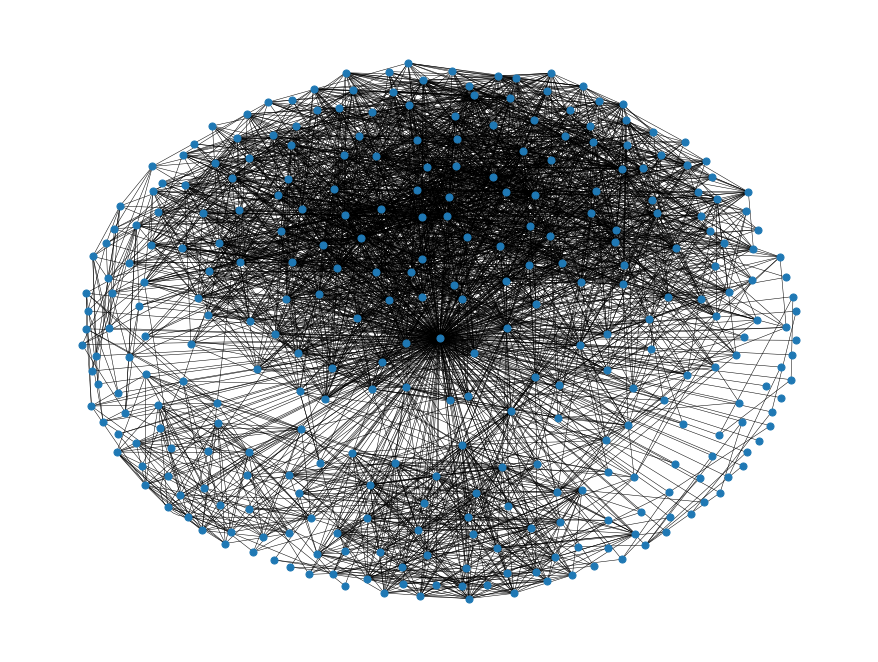

In [ ]:
graph_plot(g)

#### Without central node:

In [ ]:
g2 = g.copy()
g2.remove_node(central_users[CENTRAL_USER_ID])

In [ ]:
graph_descr(g2)

Вершины графа:

Количество - 312
Средний кластерный коэффициент - 0.43122385002107716
Средняя степень - 20.384615384615383


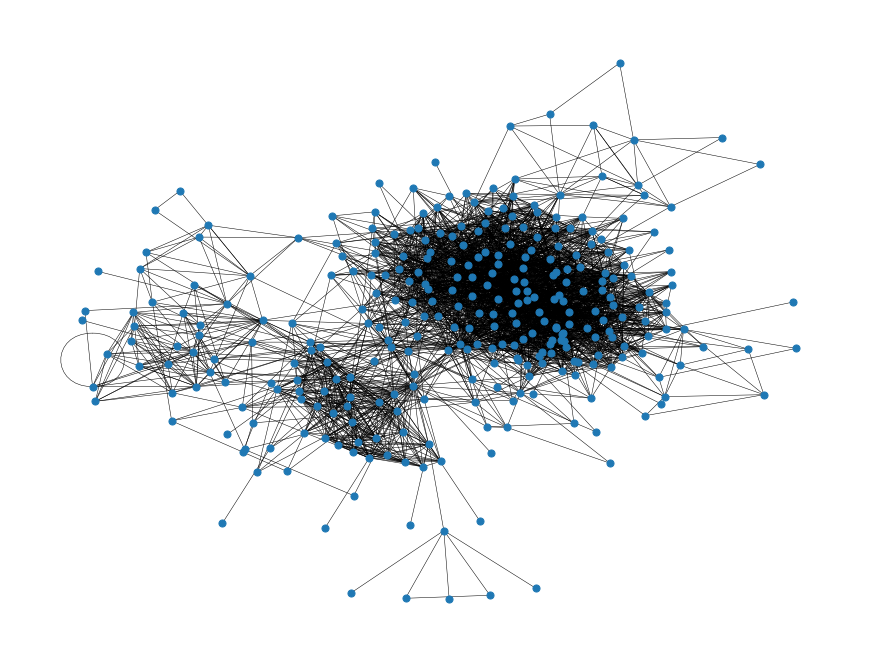

In [ ]:
graph_plot(g2)

### Basic statistics:

Let's look at basic graph statistics such as:
* `nx.radius`
* `nx.diameter`
* `nx.average_shortest_path_length`
* `nx.average_clustering`
* `nx.number_connected_components`
* `nx.number_of_isolates`
* `nx.number_of_nodes`
* `nx.number_of_edges`
* `nx.number_of_selfloops`

In [95]:
def Stats(G):
    giant = G.subgraph(list(max(nx.connected_components(G), key = len)))
    return { 'Radius': nx.radius(giant),
             'Diameter': nx.diameter(giant),
             'Average_clustering': nx.average_clustering(G),
             'Average_path_length': nx.average_shortest_path_length(giant),
             'Number_connected_components': nx.number_connected_components(G),
             'Number_isolates': nx.number_of_isolates(G),
             #'Isolates_itselves': list(nx.isolates(G)),
             'Number_nodes': nx.number_of_nodes(G),
             'Number_edges': nx.number_of_edges(G),
             'Number_selfloops': nx.number_of_selfloops(G)}
             #'Selfloops_itselves': list(nx.nodes_with_selfloops(G))}

In [96]:
Stats(g2)

{'Average_clustering': 0.43122385002107705,
 'Average_path_length': 2.7650422914263744,
 'Diameter': 7,
 'Number_connected_components': 10,
 'Number_edges': 3180,
 'Number_isolates': 5,
 'Number_nodes': 312,
 'Number_selfloops': 1,
 'Radius': 4}

In [ ]:
def convert_node_names_to_int(G):
    ### BEGIN SOLUTION
    # explicit solution
    names = list(G.nodes)
    newG = nx.Graph()
    newG.add_nodes_from(range(len(G)))
    for i, j in G.edges:
        newG.add_edge(names.index(i), names.index(j))
        newG.nodes[names.index(i)]['name'] = i
        newG.nodes[names.index(j)]['name'] = j
    for t in list(nx.isolates(g2)):
        newG.nodes[names.index(t)]['name'] = t
    return newG
    # one-line solution
    return nx.convert_node_labels_to_integers(G, label_attribute='name')
    ### END SOLUTION

In [ ]:
newG = convert_node_names_to_int(g2)

In [ ]:
len(range(len(g2))), len(newG)

(312, 312)

In [ ]:
for i in range(len(list(g2.nodes))):
  if list(g2.nodes)[i] in list(nx.isolates(g2)):
    print(i, list(g2.nodes)[i])

283 Алина Абдульманова
294 Алиса Тураева
297 Азамат Баишев
307 Кристина Денисова
308 Виталий Строй


In [ ]:
degree_sequence = [j for (i, j) in list(newG.degree())]

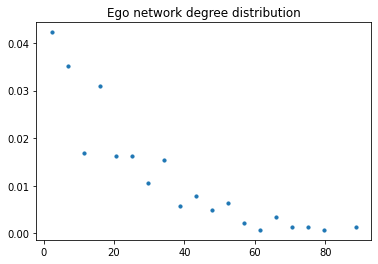

In [ ]:
hist, bin_edges = np.histogram(degree_sequence, bins=20, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.title('Ego network degree distribution')
#plt.xscale('log')
#plt.yscale('log') 
plt.show()

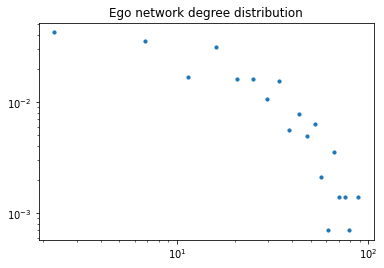

In [ ]:
hist, bin_edges = np.histogram(degree_sequence, bins=20, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.title('Ego network degree distribution')
plt.xscale('log')
plt.yscale('log') 
plt.show()

### Let's apply linear regression:

In [ ]:
def alpha_lin_bins(x_train, bins):
    # YOUR CODE HERE
    from sklearn.linear_model import LinearRegression
    y = np.histogram(x_train, bins=bins, density=True)[0].reshape(-1, 1)
    bin_edg = np.histogram(x_train, bins=bins, density=True)[1].reshape(-1, 1)
    x = (bin_edg[1:] + bin_edg[:-1]) / 2
    x_new, y_new = np.log(x[y > 0]), np.log(y[y > 0])
    #y_new[y_new == -np.inf] = 0
    #min(y_new[y_new != -np.inf])
    reg = LinearRegression().fit(x_new.reshape(-1, 1), y_new.reshape(-1, 1))
    return -float(reg.coef_)
    raise NotImplementedError()

In [ ]:
def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


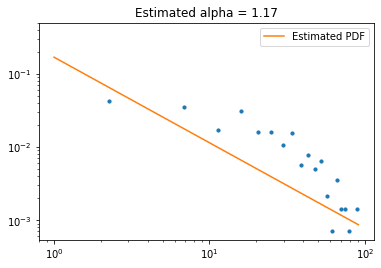

In [ ]:
x_min = 1
bins = 20

hist, bin_edges = np.histogram(degree_sequence, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)

hat_alpha = alpha_lin_bins(degree_sequence, bins)
x_space = np.linspace(1, max(degree_sequence), 1000)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, x_min), 
         label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Estimated alpha = {:.2f}'.format(hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.ylim(-0.1, 0.5)
plt.show()

The PDF of the Power law is 

$$ p(x) = Cx^{-\alpha},$$ 

where $C$ is a normalization constant 

$$C = \frac{\alpha - 1}{x_{\text{min}}^{-\alpha + 1}}$$ 

and $\alpha>1$ is called an exponent of the distribution. 

### We can see that VK friends network has a Power law degree distribution since estimated $\alpha=1.17>1$

#### We may look at degree histogram with frequency of each degree value

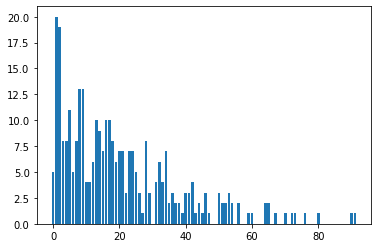

In [ ]:
plt.bar(range(len(nx.degree_histogram(g2))), nx.degree_histogram(g2));

#### Also we may look at degree distribution with fraction of each degree value, where we see similar picture compared with previous one

<BarContainer object of 92 artists>

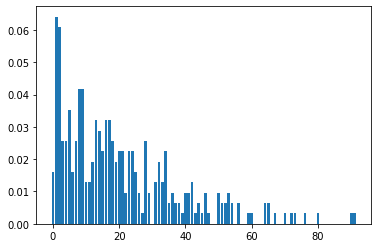

In [ ]:
degree_distribution = [i / nx.number_of_nodes(g2) for i in nx.degree_histogram(g2)]
plt.bar(range(len(degree_distribution)), degree_distribution)

Let's apply MLE with KS-test:

In [ ]:
def mle_power_law_params(degree_sequence):
    # YOUR CODE HERE
    #s = []
    a= np.inf
    best_alpha = 0
    best_xmin = 0
    import scipy
    n = len(degree_sequence)
    for i in range(1, int(degree_sequence.max())):
      degree = degree_sequence[degree_sequence-i+0.001 >0]
      st = 0
      alpha = 1
      for j in degree:
        st += np.log(j) - np.log(i)
      alpha += len(degree)* 1 /st
      #cdf = power_law_cdf(degree_sequence, alpha=alpha, x_min=x_min)
      ktest = scipy.stats.kstest(degree, cdf=lambda x: power_law_cdf(x, alpha, i)).statistic
      #s.append((alpha, i, ktest[0]))
      if ktest < a:
        a = ktest
        best_alpha=alpha
        best_xmin = i
    return best_alpha, best_xmin
    raise NotImplementedError()

In [ ]:
len(degree_sequence), max(degree_sequence), min(degree_sequence)

(312, 91, 0)

In [ ]:
degree_sequence = np.array(degree_sequence)

degree_sequence.max()

91

In [ ]:
def power_law_cdf(x, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    C = (alpha - 1) / x_min ** (1 - alpha)
    return 1 + C * x ** (1-alpha) / (1 - alpha)
    raise NotImplementedError()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


(0.0012256977288889557, 0.5)

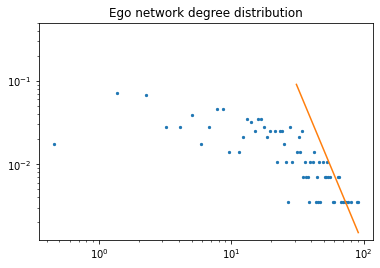

In [ ]:
bins = 100
degree_sequence = np.array(degree_sequence)

hist, bin_edges = np.histogram(degree_sequence, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=5)
plt.title('Ego network degree distribution')

hat_alpha, hat_x_min = mle_power_law_params(degree_sequence)
x_space = np.linspace(hat_x_min, max(degree_sequence), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, hat_x_min), 
         label='Estimated PDF', c='tab:orange')
plt.xscale('log')
plt.yscale('log')
plt.ylim(-3, 0.5)
#plt.show()

#### Let's look at centrality measures of the VK friends graph :

In [ ]:
def centralities(G: nx.Graph) -> Dict[str, np.array]:
    """
    Calculate degree, closeness, betweenness centralities of the graph
    
    :param G: VK friends graph
    :return: mapping of centrality names (degree, closeness, betweenness) to np.array of its values
    """
    # YOUR CODE HERE
    H = {}
    H['degree'] = np.array(list(nx.degree_centrality(G).values()))
    H['closeness'] = np.array(list(nx.closeness_centrality(G).values()))
    H['betweenness'] = np.array(list(nx.betweenness_centrality(G).values()))
    return H
    raise NotImplementedError()

In [ ]:
len(centralities(g2)['degree'])

312

In [ ]:
nx.number_of_nodes(g2), nx.number_of_nodes(newG)

(312, 312)

Next, let's look at a table with top 10 nodes for each centrality.

In [ ]:
def top10_centralities(G: nx.Graph) -> Dict[str, pd.DataFrame]:
    """
    Create table of top 10 nodes by degree, closeness, betweenness centralities
    
    :param G: VK friends graph
    :return: mapping of VK friend's name to the dataframe with columns (name, centrality)
    """
    # YOUR CODE
    d = {} 
    c = centralities(G)
    names = nx.get_node_attributes(G, 'name')
    c['name'] = list(names.values())
    df = pd.DataFrame(c)
    d['degree'] = df.sort_values(by='degree', ascending=False).head(10)[['degree', 'name']]
    d['degree'].rename(columns={'degree': 'centrality'}, inplace=True)
    d['closeness'] = df.sort_values(by='closeness', ascending=False).head(10)[['closeness', 'name']]
    d['closeness'].rename(columns={'closeness': 'centrality'}, inplace=True)
    d['betweenness'] = df.sort_values(by='betweenness', ascending=False).head(10)[['betweenness', 'name']]
    d['betweenness'].rename(columns={'betweenness': 'centrality'}, inplace=True)

    return d
    raise NotImplementedError()

In [ ]:
top_dfs = top10_centralities(newG)

We may see dataframe that contains 10 rows with highest centrality values.

In [ ]:
top_dfs

{'betweenness':      centrality                name
 92     0.060258   Сергей Виноградов
 67     0.058781       Рида Забирова
 101    0.057897        Айвар Валеев
 121    0.052533      Шалва Парулава
 213    0.047380  Эрнест Гатиятуллин
 93     0.042827  Артур Шарафутдинов
 16     0.037661   Елена Турчанинова
 61     0.037533     Айгуль Газимова
 206    0.034826     Лилия Мустафина
 10     0.033525   Мария Качуровская,
 'closeness':      centrality                name
 67     0.459038       Рида Забирова
 96     0.456680        Катя Галаева
 10     0.455899   Мария Качуровская
 93     0.446735  Артур Шарафутдинов
 136    0.446735   Лейсан Салаватова
 31     0.443025       Арина Любочка
 66     0.440828    Никита Коперский
 181    0.440828       Михаил Булкин
 94     0.437933       Роман Шарапов
 92     0.436499   Сергей Виноградов,
 'degree':      centrality                name
 96     0.292605        Катя Галаева
 10     0.289389   Мария Качуровская
 11     0.257235      Илья Бородули

Following code makes a visualization: for each centrality it prints a top 10 table and graph, where the node size and color correspond to the centrality value.

### Structural similarity

First, let's look at similarity matrices:
* Adjacency matrix
* Pearson correlation
* Jaccard similarity
* Cosine similarity

In [ ]:
def sim_matrices(G):
    # YOUR CODE HERE
    from sklearn.metrics.pairwise import cosine_similarity
    A = nx.to_numpy_array(G)
    cos = cosine_similarity(A)
    cor = np.corrcoef(A)
    jacc_sim = np.zeros(A.shape)
    jacc = nx.jaccard_coefficient(G)
    for i in jacc:
      jacc_sim[i[0]][i[1]] = i[2]
      jacc_sim[i[1]][i[0]] = i[2]
    for i in range(A.shape[0]):
      for j in range(A.shape[1]):
        if j == i:
          jacc_sim[i][j] = 1

    return (A, cor, jacc_sim, cos)

    raise NotImplementedError()

In [ ]:
A, corr, J, cos = sim_matrices(newG)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


### Assortative mixing

In [ ]:
def mixing(G):
    # YOUR CODE HERE
    se = set(nx.get_node_attributes(G, 'name').values())
    j = {}

    for i in range(len(list(se))):
      j[list(se)[i]] = i

    m = nx.attribute_mixing_matrix(G, 'name')

    return (m, j)
    raise NotImplementedError()

In [ ]:
mixing, mapping = mixing(newG)

### Community detection

#### Aglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import squareform

from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
def simrank_distance(G):
    # YOUR CODE HERE
    s = nx.simrank_similarity(G)
    m = np.array([[s[u][v] for v in G] for u in G])
    for i in range(m.shape[0]):
      for j in range(m.shape[1]):
        if j < i: m[i][j] = m[j][i]
        else: m[i][j] = 1 - m[i][j]
    return m
    raise NotImplementedError()

In [ ]:
distance = simrank_distance(newG)

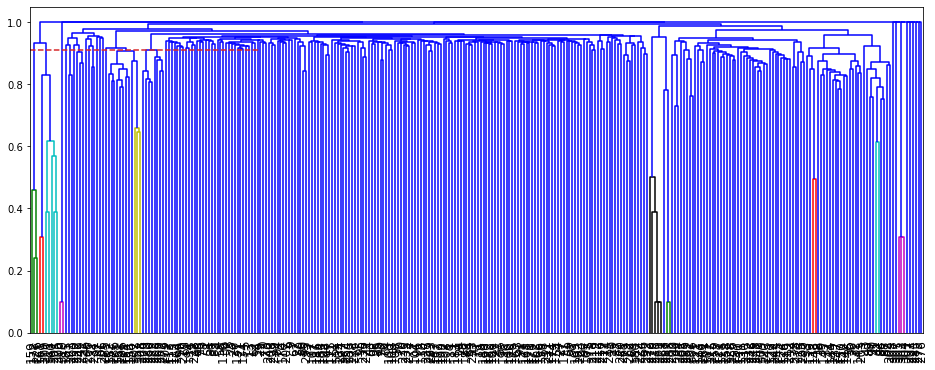

In [ ]:
plt.figure(figsize=(16, 6))
linked = linkage(squareform(distance), 'complete')
dendrogram(linked, labels=list(newG.nodes), 
           leaf_font_size=12)
plt.plot([0, 800], [0.91, 0.91], linestyle='--', c='tab:red')
plt.show()

In [ ]:
def agglomerative_clustering(distance, max_distance):
    # YOUR CODE HERE
    m = 1.23 + (max_distance - 0.8) * 5.3
    a = (AgglomerativeClustering(n_clusters=None, compute_full_tree=True, linkage='complete', distance_threshold=m).fit(distance)).labels_
    return a
    raise NotImplementedError()

In [ ]:
lespos = nx.kamada_kawai_layout(newG)

We can see communities from agglomerative clustering:

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


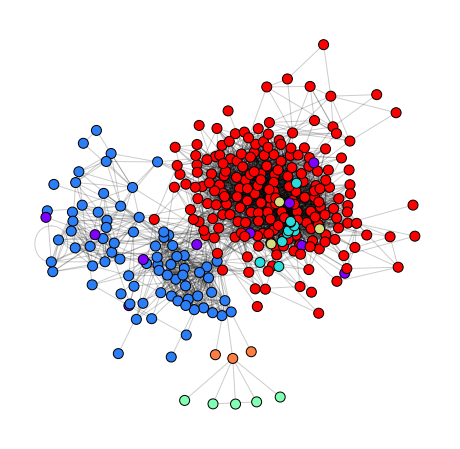

In [ ]:
labels = agglomerative_clustering(distance, 0.91)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(
    newG, 
    lespos,
    cmap=plt.cm.rainbow,
    node_color=labels, 
    node_size=100, 
    linewidths=1, 
    edgecolors='black'
)
nx.draw_networkx_edges(
    newG,
    lespos,
    alpha=0.2,
    edge_color='black'
)
plt.axis('off')
plt.show()

### Louvain method



Louvain method is one of the mostcited works in the community detection literature. It is a heuristic method based on modularity optimization for extracting the community structure of large networks. Let's consider this method on a graph of VK friends.

In [ ]:
def louvain_method(G):
    
    # Phase 1: community unfolding
    communities = unfolded_communities(G)

    # Create labels
    labels = np.zeros(len(G))
    for i, c in enumerate(communities):
        labels[c] = i
    
    # Phase 2: network aggregation
    nextG = nx.empty_graph(len(communities), nx.MultiGraph)
    for e in G.edges:
        nextG.add_edge(labels[int(e[0])], labels[int(e[1])])
       
    return communities, labels, nextG

In [ ]:
def expected_edges(A, m):
    # YOUR CODE HERE
    C = np.zeros((A.shape))
    b = A.sum(axis=0)
    for i in range(A.shape[0]):
      for j in range(A.shape[1]):
        C[i][j] = b[i] * b[j] / (2 * m)
    return C
    raise NotImplementedError()

In [ ]:
def modularity_gain(A, ee, mnode, old_comm, new_comm, m):
    # YOUR CODE HERE
    sum1 = 0; sum2 = 0;
    for i in new_comm:
      sum1 += A[mnode][i] - ee[mnode][i]
    for i in old_comm:
      sum2 += A[mnode][i] - ee[mnode][i]
    return (sum1 - sum2) / m
    raise NotImplementedError()

In [ ]:
def unfolded_communities(G):
    # Proposed template:
    A = nx.to_numpy_array(G)
    m = A.sum() / 2
    ee = expected_edges(A, m)
    communities = [[n] for n in G.nodes] # initial partition
    max_modularity_gain = 1
    while max_modularity_gain > 0:
        for node in G.nodes:
            '''
            1) Remove the node from the initial community.
            2) Iterate all neighboring communities and put a node 
               in the community with maximal modularity gain. If 
               there is no modularity gain, return the node into 
               the initial community.
            '''
            # YOUR CODE HERE
            for i in communities:
              if node in i:
                i.remove(node)
                lst = [modularity_gain(A, ee, node, i, j, m) for j in communities]
            j = lst.index(max(lst))
            max_modularity_gain = lst[j]
            communities[j].append(node)
    return [c for c in communities if len(c)]
    raise NotImplementedError()

In [ ]:
iterG = newG.copy()
prev_comm, labels, iterG = louvain_method(iterG)
for i in range(2):
    next_comm, labels, iterG = louvain_method(iterG)
    communities = []
    for c in next_comm:
        temp = []
        for node in c:
            temp.extend(prev_comm[node])
        communities.append(temp)
    prev_comm = communities.copy()
labels = np.zeros(len(newG))
for i, c in enumerate(communities):
    labels[c] = i

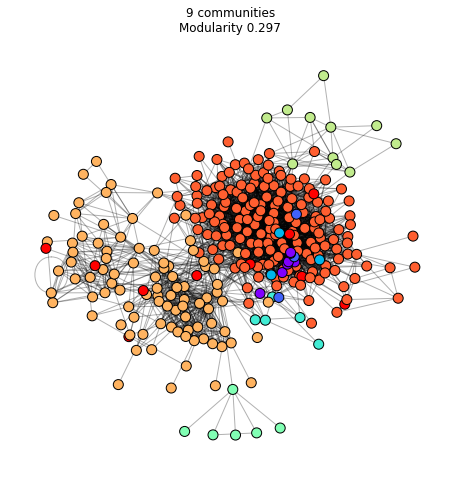

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(
    newG, 
    lespos,
    cmap=plt.cm.rainbow,
    node_color=labels, 
    node_size=100, 
    edgecolors='black'
)
nx.draw_networkx_edges(newG, lespos, alpha=0.3)
plt.title(
    '{} communities\nModularity {:.3f}'.format(
        len(communities), 
        nx.community.modularity(newG, communities)
    )
)
plt.axis('off');

### Label propagation

Among all the community detection techniques, label propagation is neither the most accurate nor the most robust method. It is, however, without doubt one of the simplest and fastest clustering methods. The label propagation method is based on the simple idea: every node is initialized with a unique label and at every step each node adopts the label that most of its neighbors currently have.

In [ ]:
def max_lst(lst):
  max = None
  max_q = 0
  set_lst = set(lst)
  for k in set_lst:
    q = lst.count(k)
    if q > max_q:
      max_q = q
      max = k
  return (max, max_q)

def sync_update_labels(graph, labels):
    # YOUR CODE HERE
    new_labels = []
    for i in graph.nodes:
      lst = []
      for j in graph.neighbors(i):
        lst.append(labels[j])
      max, max_q = max_lst(lst)
      if max_q >= 1:
        new_labels.append(max)
      else:
        new_labels.append(labels[i])
    if set(labels) == set([0,1,2]):
      return np.array([0,1,2])
    else:
      return np.array(new_labels)
    raise NotImplementedError()

In [ ]:
def plot_propagation(G, update_method, n=50):
    pos=nx.kamada_kawai_layout(G)
    labels = np.array(list(G.nodes))
    for i in range(n):
        clear_output(wait=True)
        labels = update_method(G, labels)
        plt.figure(figsize=(8, 8))
        nx.draw_networkx_nodes(
            G, 
            pos=pos, 
            node_color=labels, 
            cmap=plt.cm.rainbow,
            node_size=100, 
            edgecolors='black'
        )
        nx.draw_networkx_edges(G, pos=pos, alpha=0.2)
        plt.axis('off')
        plt.title('Iteration {}/{}'.format(i+1, n))
        plt.show()

In [ ]:
from IPython.display import clear_output

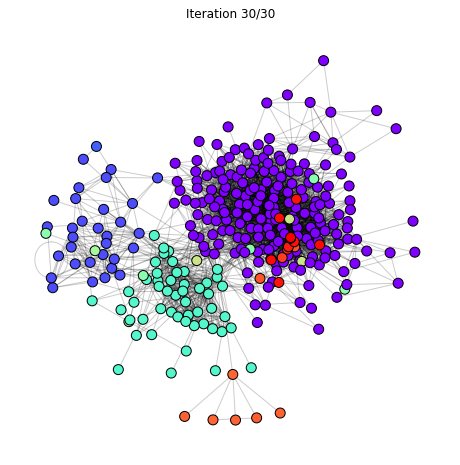

In [ ]:
plot_propagation(newG, sync_update_labels, 30)

Let's make asynchronous label updating. The order in which all the n nodes in the network are updated is chosen randomly at each iteration.

In [ ]:
import random
def async_update_labels(graph, labels):
    # YOUR CODE HERE
    new_labels = []; new_labels.extend(labels)
    n = graph.number_of_nodes()
    nodes = list(range(n))
    for i in range(n):
      i = random.choice(nodes)
      nodes.remove(i)
      neigh = [new_labels[j] for j in graph.neighbors(i)]
      max, max_q = max_lst(neigh)
      new_labels[i] = max
    return np.array(new_labels)
    raise NotImplementedError()

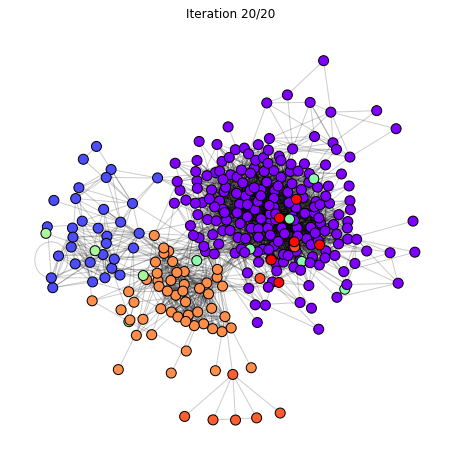

In [ ]:
plot_propagation(newG, async_update_labels, 20)

In [ ]:
from networkx import k_core

In [ ]:
newG_no_selfloops = newG.copy()

In [ ]:
newG_no_selfloops.remove_edges_from(nx.selfloop_edges(newG_no_selfloops))

In [ ]:
k_cores = k_core(newG_no_selfloops)

In [ ]:
k_cores

In [ ]:
nx.write_graphml(g2, 'graph.graphml')